In [1]:
#Rubén Esteban Lagos Godoy
#Ing Civil Matemática
#20240518518

### Tarea Semana 1 , Módulo 2- Herramientas básicas para el Análisis de Datos

#### 1) Considere un conjunto de $ N = 10000 $ realizaciones independientes:
$$ X_{1}, X_{2},..., X_{N} $$

de una variable aleatoria Normal estándar $\mathcal{N} (0,1)$. 

Entregue un reporte con un estudio de Estadística Descriptiva acerca de los datos estadísticos:

##### A) Grafique los datos estadísticos: 

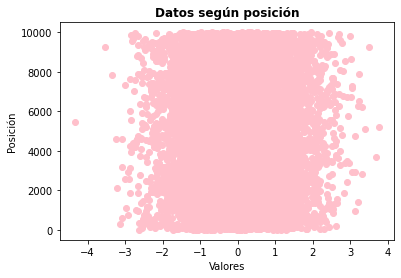

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10**7)
pos= np.linspace(0,10000,10000) 
num_aleatorios= np.random.normal(0,1, 10000)
plt.xlabel('Valores')
plt.ylabel('Posición')
plt.title(r'Datos según posición',
          fontweight ="bold")
plt.scatter(num_aleatorios, pos, color='pink')

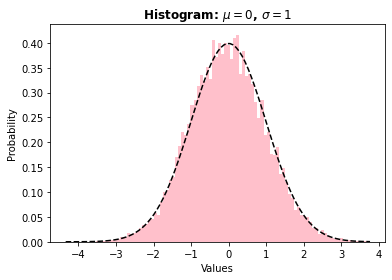

In [3]:
# Implementation of matplotlib function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
mu = 0
sigma = 1
x = num_aleatorios
   
num_bins = 100
   
n, bins, patches = plt.hist(x, num_bins, density = 1, color ='pink',alpha = 1)
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
  
plt.xlabel('Values')
plt.ylabel('Probability')
  
plt.title(r'Histogram: $\mu=0$, $\sigma=1$',
          fontweight ="bold")
 
plt.show()

b) Calcule los estadísticos de tendencia: Media, Moda, mediana, cuartiles, deciles, percentiles

$Media:= \overline{X}:=\dfrac{1}{N} \displaystyle\sum_{i=1}^{N} X_{i} \\
Mediana := \left\{ \begin{array}{lcc}
             X_{i_{\lfloor N/2 \rfloor +1}};          &   \text{si  N es impar} \\
             \\ \dfrac{X_{i_{N/2}}+X_{i_{N/2+1}}}{2}; &  \text{si N es par} 
             \end{array}
   \right. \\
\text{Cuartiles} \; Q_{1},...,Q_{4}: \text{Datos ordenados en cuatro partes porcentualmente iguales} \\
\text{Deciles} \; D_{1},...,D_{10}: \text{Datos ordenados en diez partes porcentualmente iguales} \\
\text{Percentiles} \; P_{1},...,P_{100}: \text{Datos ordenados en cien partes porcentualmente iguales}$


In [4]:
from statistics import mode, median, mean
print('El valor de la moda es: ',mode(num_aleatorios))
print('El valor de la media es: ',mean(num_aleatorios))
print('El valor de la mediana es: ',median(num_aleatorios))
#Importante, el valor de la media > mediana , por ende Asimétrica a la derecha, Asimétrica de cola derecha
#Este hecho se manifiesta como una cola de valores a la derecha de la media

El valor de la moda es:  0.18669052937863562
El valor de la media es:  -0.027307111048025537
El valor de la mediana es:  -0.03783773720933728


In [5]:
print('percentiles using interpolation = ', "linear")

percentile_25 = np.percentile(num_aleatorios, 25,method='linear') 
percentile_50 = np.percentile(num_aleatorios, 50,method='linear') 
percentile_75 = np.percentile(num_aleatorios, 75,method='linear')
percentile_100 =np.percentile(num_aleatorios, 100,method='linear')

print('percentile_25 = ',percentile_25,'\n','percentile_50 = ',percentile_50,'\n', 'percentile_75 = ',percentile_75,'\n', 'percentile_100 = ', percentile_100)

percentiles using interpolation =  linear
percentile_25 =  -0.7168152723990537 
 percentile_50 =  -0.03783773720933728 
 percentile_75 =  0.6341927583770394 
 percentile_100 =  3.773739871789337


c) Obtenga estadísticos de dispersión: Varianza, desviación estándar, índice de variación cualitativa (IVC), rango o desviación máxima, desviación media (DM), desviación semi-intercuartil (Q):

$\text{Varianza} \; S^{2}:= \dfrac{1}{N} \displaystyle\sum_{i=1}^{N}\left( X_{i} - \overline{X} \right) ^{2} \\
\text{Desviación estándar} \; S:= \sqrt{ \dfrac{1}{N} \displaystyle\sum_{i=1}^{N}\left( X_{i} - \overline{X} \right) ^{2}} \\
\text{IVC de Wilcox:} \; \dfrac{n}{n-1}\left( 1 - \dfrac{f_{m}}{N} \right)  \\
\text{IVC de Gibss:} \; \dfrac{n}{n-1}\left( 1 - \displaystyle\sum_{j=1}^{n} \left( \dfrac{f_{j}}{N} \right)^{2} \right) \\ 
\text{Rango:} \; X_{max} - X_{min} \\ 
\text{Desviación media:} \; DM= \dfrac{1}{N}\displaystyle\sum_{i=1}^{N} \left| X_{i} - \overline{X} \right| \\
\text{Desviación semi-intercuartli:} \; Q= \dfrac{Q_{3}-Q_{1}}{2} $


In [6]:
from numpy import var,ptp, mean, absolute 
print('Varianza de a es :',var(num_aleatorios))
print('Desviación estándar de a es :',np.std(num_aleatorios))
print('Rango de los datos :', ptp(num_aleatorios))
print('Desviación media absoluta :', mean(absolute(num_aleatorios - mean(num_aleatorios))))
print('Desviación semi-intercuartil :', (percentile_75 - percentile_25)/2) 

Varianza de a es : 1.0068787870144735
Desviación estándar de a es : 1.0034334990493758
Rango de los datos : 8.11576558865242
Desviación media absoluta : 0.8001217796771318
Desviación semi-intercuartil : 0.6755040153880465


ch) Construya estadísticos de asimetría y curtosis: 
$\text{Asimetría de Fisher-Pearson:} \; \rho := \dfrac{1}{N}\displaystyle\sum_{i=1}^{N} \dfrac{\left( X_{i} - \overline{X} \right)^{3} }{\left( S^{2} \right) ^{3/2}} \\
\text{Segundo coeficiente de asimetría de Pearson:} \; \dfrac{ 3 \left( \overline{X} - mediana \right) }{S} \\
\text{Asimetría de Galton:} \; \dfrac{Q_{3} - 2Q_{2} + Q_{1}}{Q_{3}-Q_{1}} \\
\text{Asimetría mediante percentiles} \; \dfrac{P_{90}-2P_{50}+P_{10}}{P_{90}-P_{10}} \\ 
\text{Curtosis: } \mathcal{k}:= \dfrac{1}{N}\displaystyle\sum_{i=1}^{N} \dfrac{\left( X_{i} - \overline{X} \right)^{4} }{\left( S^{2} \right) ^{2}}  \\
\text{Curtosis: } \hat{\mathcal{k}} := \dfrac{Q}{P_{90} - P_{10}} $

In [7]:
#Asimetría de Fisher-Pearson: 
sum=0
valor= 0
media= mean(num_aleatorios)
for i in range(len(num_aleatorios)):
    sum= ((num_aleatorios[i] - media)**3 ) / (var(num_aleatorios)**(3/2))
    valor= valor + sum 
asimetria1= valor * (1/len(num_aleatorios))
print('Asimetría de Fisher Pearson :', asimetria1)
# Como la asimetría de Fisher Pearson es menor 0, entonces la distribución es asimetricamente negativa, osea que la cola de la distribución apunta hacia la izquierda
    

Asimetría de Fisher Pearson : 0.05898513249705914


In [8]:
#Segundo coeficiente de asimetría de Pearson: 
asimetria2= 3*( media - median(num_aleatorios)) / np.std(num_aleatorios) 
print(' Segundo coeficiente de asimetría de Pearson: ',asimetria2)
# Como la Asimetría de Pearson es mayor que 0, Entonces la distribución es asimétrica hacia la derecha o tiene sesgo positivo

 Segundo coeficiente de asimetría de Pearson:  0.03148377895880938


In [9]:
#Asimetría de Galton: 
galton= ( percentile_75 - 2*percentile_50 + percentile_25) / (percentile_75 - percentile_25)
print('Asimetría de Galton :', galton)
#Como la asimetria de galton es negativa, entonces la distribucion es negativa

Asimetría de Galton : -0.005142115698119867


In [10]:
#Asimetría mediante percentiles
asimetriap= ( np.percentile(num_aleatorios, 90,method='linear') - 2* np.percentile(num_aleatorios, 50,method='linear')  + np.percentile(num_aleatorios, 10,method='linear')) / (np.percentile(num_aleatorios, 90,method='linear') - np.percentile(num_aleatorios, 10,method='linear'))
print('Asimetría mediante percentiles :',asimetriap)

Asimetría mediante percentiles : 0.025154983083433256


In [11]:
#curtosis k 
cont=0; valor=0
varianza=var(num_aleatorios)
for i in range(len(num_aleatorios)):
    cont= ((num_aleatorios[i] - media)**4) / varianza**(2)
    valor= valor + cont
curtosis= valor * (1/len(num_aleatorios))
print('Curtosis :', curtosis)
# Como el valor de la curtosis es menor que 3, podemos afirmar que la distribución de frecuencias es platicúrtica, es decir existe una baja concentración de los valores en torno a su media

Curtosis : 3.0287652622259467


In [12]:
#curtosis K gorrito: 
curtosis2= ((percentile_75 - percentile_25)/2)  / ( np.percentile(num_aleatorios, 90,method='linear') - np.percentile(num_aleatorios, 10,method='linear') ) 
print('Curtosis k gorrito: ', curtosis2)
#Pero la k gorrito me da mayor a 0.263 !!!!!!

Curtosis k gorrito:  0.26346606854056653


In [13]:
from scipy import stats
sesgo = stats.skew (x) #buscando sesgo
curtosis_nueva = stats.kurtosis (x) #buscando curtosis 
sesgo, curtosis_nueva

(0.058985132497058904, 0.028765262225953325)

d) Construya una tabla de frecuencias y aproxime los estadísticos $ \overline{X}, S^{2}, \rho, \mathcal{k} $:

$\overline{X} \approx \dfrac{1}{N} \displaystyle\sum_{j=1}^{n} f_{j} \cdot \hat{X}_{j} \\
S^{2} \approx \dfrac{1}{N} \displaystyle\sum_{j=1}^{n}f_{j} \cdot \left( \hat{X}_{j} - \overline{X} \right)^2 \\ 
\rho \approx \dfrac{1}{N} \dfrac { \displaystyle\sum_{j=1}^{n}f_{j} \cdot \left( \hat{X}_{j} - \overline{X} \right)^3 } { \left( S^2 \right)^{(3/2)}} \\
\mathcal{k} \approx \dfrac{1}{N} \dfrac { \displaystyle\sum_{j=1}^{n}f_{j} \cdot \left( \hat{X}_{j} - \overline{X} \right)^4} { \left( S^2 \right)^2} $

Donde $\hat{X}_{j}$ corresponden a las marcas de clase de cada intervalo $j$, $f_{j}$ denota las frecuencias de cada clase $j$


In [14]:
import numpy as np
import pandas as pd
import math

data=num_aleatorios
datos = data[:].flatten()

k = 1 +  math.log2(len(datos))
periodos = math.ceil(k)

inf = datos.min()        # Limite inferior del primer intervalo
dif = datos.max()
sup = datos.max() + 1    # Limite superior del último intervalo

intervals = pd.interval_range(start=inf,end=sup,periods=k,name="Intervalo",closed="left")

df = pd.DataFrame(index=intervals)
df["Freq"] = pd.cut(datos, bins=df.index).value_counts()
df["Marca"]  = df.index.mid

df["LimInf"] = df.index.left
df["LimSup"] = df.index.right
df

,Freq,Marca,LimInf,LimSup
Intervalo,,,,
"[-4.342025716863084, -3.690899603387911)",1,-4.016463,-4.342026,-3.690900
"[-3.690899603387911, -3.039773489912738)",8,-3.365337,-3.690900,-3.039773
"[-3.039773489912738, -2.3886473764375653)",84,-2.714210,-3.039773,-2.388647
"[-2.3886473764375653, -1.7375212629623924)",311,-2.063084,-2.388647,-1.737521
"[-1.7375212629623924, -1.0863951494872195)",1035,-1.411958,-1.737521,-1.086395
"[-1.0863951494872195, -0.4352690360120466)",2003,-0.760832,-1.086395,-0.435269
"[-0.4352690360120466, 0.21585707746312632)",2564,-0.109706,-0.435269,0.215857
"[0.21585707746312632, 0.8669831909382992)",2132,0.541420,0.215857,0.866983
"[0.8669831909382992, 1.5181093044134721)",1232,1.192546,0.866983,1.518109


In [15]:
#Media
cont=0; valor=0; i=0
for i in range(len(df)):
    cont= df.Freq.values[i] * df.Marca.values[i] 
    valor=valor + cont

media_est=valor* (1/ len(data))
media_est 

-0.025906048470205344

In [16]:
#Varianza_est
sum=0; valor=0
for i in range(len(df)):
    cont= df.Freq.values[i] * ( df.Marca.values[i] - media_est )**2
    valor=valor + cont
var_est= valor * (1 / len(data))
var_est 

1.0376702594786023

In [17]:
#rho
cont=0; valor= 0
for i in range(len(df)):
    cont = ( df.Freq.values[i] * ( df.Marca.values[i] - media_est )**(3) ) / (var_est)**(3/2) 
    valor= valor + cont
rho_est= valor * (1 /len(data))
rho_est


0.05374001777954633

In [18]:
#k
cont=0; valor=0,
for i in range(len(df)):
    cont = ( df.Freq.values[i] * (df.Marca.values[i] - media_est )**(4) ) / (var_est)**(2) 
    valor= valor + cont
k_est= valor * (1 /len(data))
k_est


array([3.01705212])

e) Ilustre la distribución de frecuencias relativas a partir de ítem anterior mediante un histograma y un polígono de frecuencias.

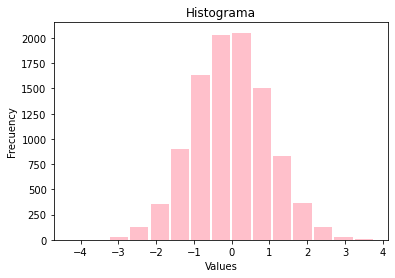

In [19]:
import numpy as np 
import matplotlib.pyplot as plt


plt.hist(data, bins=periodos, rwidth=0.9, color= 'pink')
plt.xlabel('Values')
plt.ylabel('Frecuency')
plt.title('Histograma')
plt.show()

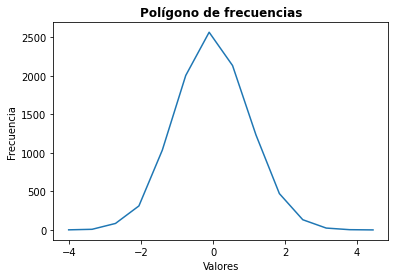

In [20]:
x= df.Marca.values
y= df.Freq.values
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title(r'Polígono de frecuencias',
          fontweight ="bold")
plt.plot(x,y)

In [21]:
freq= df.Freq.values 
a=[]; b= 0
for c in freq:
    b= c + b
    a.append(b)
df['Freq_acum']=a 
df

,Freq,Marca,LimInf,LimSup,Freq_acum
Intervalo,,,,,
"[-4.342025716863084, -3.690899603387911)",1,-4.016463,-4.342026,-3.690900,1
"[-3.690899603387911, -3.039773489912738)",8,-3.365337,-3.690900,-3.039773,9
"[-3.039773489912738, -2.3886473764375653)",84,-2.714210,-3.039773,-2.388647,93
"[-2.3886473764375653, -1.7375212629623924)",311,-2.063084,-2.388647,-1.737521,404
"[-1.7375212629623924, -1.0863951494872195)",1035,-1.411958,-1.737521,-1.086395,1439
"[-1.0863951494872195, -0.4352690360120466)",2003,-0.760832,-1.086395,-0.435269,3442
"[-0.4352690360120466, 0.21585707746312632)",2564,-0.109706,-0.435269,0.215857,6006
"[0.21585707746312632, 0.8669831909382992)",2132,0.541420,0.215857,0.866983,8138
"[0.8669831909382992, 1.5181093044134721)",1232,1.192546,0.866983,1.518109,9370


<AxesSubplot:title={'center':'Histograma frecuencias acumuladas'}, xlabel='Marca', ylabel='Frecuencia acumulada'>

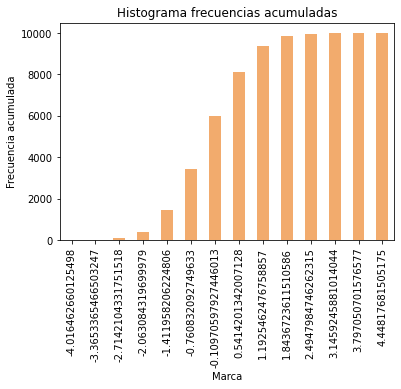

In [22]:
df.groupby('Marca')['Freq_acum'].sum().plot(kind='bar',
                                           color='#F2AB6D',
                                           title='Histograma frecuencias acumuladas',
                                           ylabel='Frecuencia acumulada')

In [23]:
#Cálculo de IVC 
tam=len(df)
wilcox= ( tam / (tam - 1 )) * (1 - 2564 / len(num_aleatorios))
wilcox

0.8008

In [24]:
#Cálculo de IVC
for i in range(len(df)):
    cont= (df.Freq.values[i] / len(num_aleatorios))**2 + cont
cont2= 1 -cont

gibbs= ( tam / (tam - 1 )) * cont2
gibbs

0.8823847846153845